In [92]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt


In [93]:
#other useful imports 
import os
import numpy as np
import scipy as sp
import scipy.stats as stats
import h5py

In [98]:
ls /mnt/data3/yamins/skdata_home/edward_data

InstEval.csv


In [94]:
import pandas as pd   #this is a python package for tabular data handling
from observations import insteval

#loading the data from csv
data_path = os.path.join(os.environ["SKDATA_ROOT"], "edward_data")
data, metadata = insteval(data_path)

#putting the data into pandas
data = pd.DataFrame(data, columns=metadata['columns'])


In [6]:
data

,s,d,studage,lectage,service,dept,y
0,1,1002,2,2,0,2,5
1,1,1050,2,1,1,6,2
2,1,1582,2,2,0,2,5
3,1,2050,2,2,1,3,3
4,2,115,2,1,0,5,2
5,2,756,2,1,0,5,4
6,3,7,2,1,1,11,4
7,3,13,2,1,0,10,5
8,3,36,2,1,0,10,5
9,3,140,2,1,0,10,4


In [99]:
import rpy2.robjects as robjects

In [100]:
dir(robjects)

['Array',
 'BoolVector',
 'ComplexVector',
 'DataFrame',
 'DateVector',
 'Environment',
 'FactorVector',
 'FloatVector',
 'Formula',
 'Function',
 'IntVector',
 'ListVector',
 'Matrix',
 'NA_Character',
 'NA_Complex',
 'NA_Integer',
 'NA_Logical',
 'NA_Real',
 'NULL',
 'POSIXct',
 'POSIXlt',
 'ParsedCode',
 'R',
 'RObject',
 'RObjectMixin',
 'RS4',
 'Sexp',
 'SexpClosure',
 'SexpEnvironment',
 'SexpExtPtr',
 'SexpS4',
 'SexpVector',
 'SignatureTranslatedFunction',
 'SourceCode',
 'StrSexpVector',
 'StrVector',
 'TYPEORDER',
 'Vector',
 '_',
 '__builtins__',
 '__doc__',
 '__file__',
 '__name__',
 '__package__',
 '__path__',
 '_function_to_ri',
 '_globalenv',
 '_reval',
 '_rparse',
 'array',
 'baseenv',
 'constants',
 'conversion',
 'datetime',
 'default_converter',
 'default_py2ri',
 'emptyenv',
 'environments',
 'functions',
 'globalenv',
 'help',
 'int2ri',
 'itertools',
 'lib',
 'methods',
 'numpy2ri',
 'os',
 'packages',
 'packages_utils',
 'pandas2ri',
 'py3bytes',
 'py3str',
 'r',

In [8]:
#to let rpy2 know that you want it to interpret "data" inputs from python
#to R in the "pandas" form
from rpy2.robjects import r, pandas2ri
pandas2ri.activate()

In [101]:
resid = robjects.r['resid']

In [102]:
resid

R object with classes: ('function',) mapped to:
<SignatureTranslatedFunction - Python:0x7f8e79173878 / R:0x82f2218>

In [45]:
lm = robjects.r['lm']

In [103]:
lm

R object with classes: ('function',) mapped to:
<SignatureTranslatedFunction - Python:0x7f8e7badf680 / R:0x82f1458>

In [104]:
m = lm(formula='y ~ 1 + service', data=data)

In [113]:
#how to access data about the trained R model in python
np.asarray(m[0])

array([ 3.26223642, -0.13049933])

In [114]:
resid_vec.shape

(73421,)

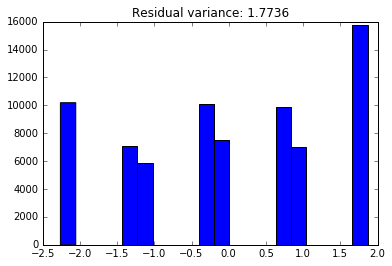

In [115]:
#train the model
m = lm(formula='y ~ 1 + service', data=data)
#call the residual function on the trained model 
resid_vec = np.asarray(resid(m))

plt.hist(resid_vec, bins=20);
plt.title('Residual variance: %.4f' % resid_vec.var())

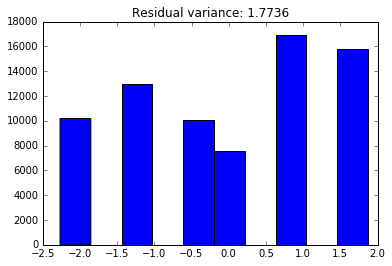

In [116]:
m_more = lm(formula='y ~ 1 + service + d', data=data)
resid_vec_more = np.asarray(resid(m_more))
plt.hist(resid_vec_more);
plt.title('Residual variance: %.4f' % resid_vec_more.var())

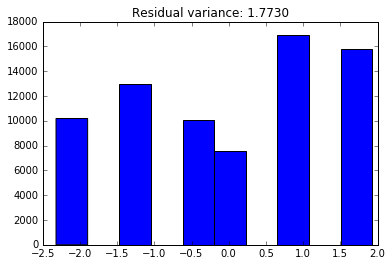

In [117]:
m_all = lm(formula='y ~ 1 + d + dept + s + service', data=data)
resid_vec_all = np.asarray(resid(m_all))
plt.hist(resid_vec_all);
plt.title('Residual variance: %.4f' % resid_vec_all.var())

In [66]:
from rpy2.robjects.packages import importr
lme4 = importr('lme4')

In [118]:
lme4

rpy2.robjects.packages.Package as a <module 'lme4' (built-in)>

In [119]:
dir(lme4)

['Cv_to_Sv',
 'Cv_to_Vv',
 'Eigen_SSE',
 'GHrule',
 'GQN',
 'GQdk',
 'Gamma_simfun',
 'NelderMead',
 'NelderMead_Create',
 'NelderMead_newf',
 'NelderMead_setForce_stop',
 'NelderMead_setFtol_abs',
 'NelderMead_setFtol_rel',
 'NelderMead_setIprint',
 'NelderMead_setMaxeval',
 'NelderMead_setMinf_max',
 'NelderMead_value',
 'NelderMead_xeval',
 'NelderMead_xpos',
 'Nelder_Mead',
 'REMLcrit',
 'RHSForm',
 'RHSForm<-',
 'RglmerWrkIter',
 'Sv_to_Cv',
 'VarCorr_merMod',
 'Vv_to_Cv',
 '_S3MethodsClasses',
 '___C__NelderMead',
 '___C__family',
 '___C__glmFamily',
 '___C__glmResp',
 '___C__glmerMod',
 '___C__golden',
 '___C__lmList4',
 '___C__lmList4_confint',
 '___C__lmResp',
 '___C__lmerMod',
 '___C__lmerResp',
 '___C__merMod',
 '___C__merPredD',
 '___C__nlmerMod',
 '___C__nlsResp',
 '___C__rePos',
 '___C__vcRep',
 '___NAMESPACE___',
 '___S3MethodsTable___',
 '___T__getL:lme4',
 '___T__show:methods',
 '___global__',
 '___suppressForeign__',
 '__doc__',
 '__name__',
 '__rdata__',
 '__rname__'

In [120]:
lme4.lmer

R object with classes: ('function',) mapped to:
<DocumentedSTFunction - Python:0x7f8e79bb2f38 / R:0x84ebd30>

In [56]:
lme4.lmer.__rname__

'lmer'

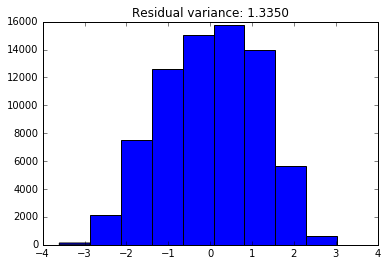

In [121]:
m1 = lme4.lmer(formula='y ~ 1 + service + (1|s) + (1|d) + (1|dept)', data=data)
resid_vec1 = np.asarray(resid(m1))
plt.hist(resid_vec1);
plt.title('Residual variance: %.4f' % resid_vec1.var())

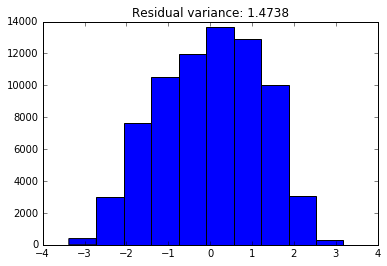

In [57]:
m2 = lme4.lmer(formula='y ~ 1 + service + (1|dept) + (1|d)', data=data)
resid_vec2 = np.asarray(resid(m2))
plt.hist(resid_vec2);
plt.title('Residual variance: %.4f' % resid_vec2.var())

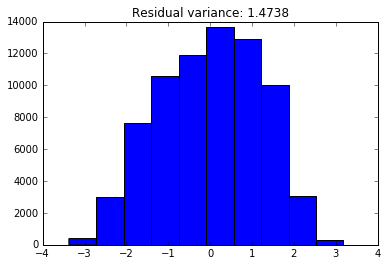

In [58]:
m3 = lme4.lmer(formula='y ~ 1 + service + (1|d)', data=data)
resid_vec3 = np.asarray(resid(m3))
plt.hist(resid_vec3);
plt.title('Residual variance: %.4f' % resid_vec3.var())

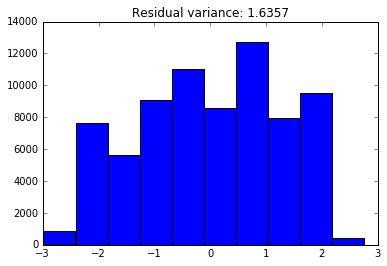

In [59]:
m4 = lme4.lmer(formula='y ~ 1 + service + (1|s)', data=data)
resid_vec4 = np.asarray(resid(m4))
plt.hist(resid_vec4);
plt.title('Residual variance: %.4f' % resid_vec4.var())

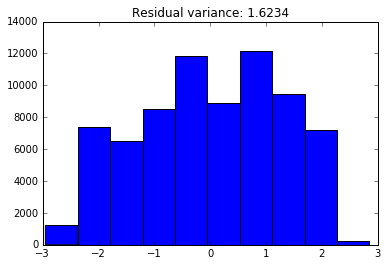

In [60]:
m5 = lme4.lmer(formula='y ~ 1 + service + (1|s) + (1|dept)', data=data)
resid_vec5 = np.asarray(resid(m5))
plt.hist(resid_vec5);
plt.title('Residual variance: %.4f' % resid_vec5.var())

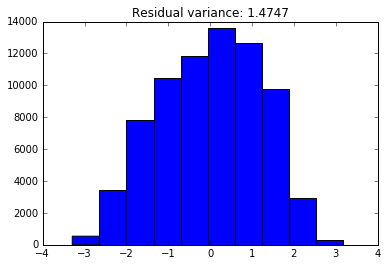

In [61]:
m6 = lme4.lmer(formula='y ~ 1 + (1|d)', data=data)
resid_vec6 = np.asarray(resid(m6))
plt.hist(resid_vec6);
plt.title('Residual variance: %.4f' % resid_vec6.var())

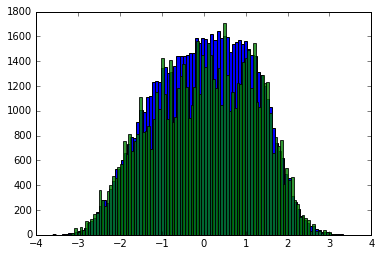

In [19]:
plt.hist(resid_vec1,bins=100);
plt.hist(resid_vec6,bins=100, alpha=.8);

In [11]:
#ok let's load our usual data 
DATA_PATH = "/home/chengxuz/Class/psych253_2018/data/ventral_neural_data.hdf5"
Ventral_Dataset = h5py.File(DATA_PATH)

In [12]:
Neural_Data = Ventral_Dataset['time_averaged_trial_averaged'][:]
IT_NEURONS = Ventral_Dataset['neural_meta']['IT_NEURONS']
V4_NEURONS = Ventral_Dataset['neural_meta']['V4_NEURONS']
V4_Neural_Data = Neural_Data[:, V4_NEURONS]
IT_Neural_Data = Neural_Data[:, IT_NEURONS]

var_level = Ventral_Dataset['image_meta']['variation_level'][:]
categories = Ventral_Dataset['image_meta']['category'][:]   #array of category labels for all images  --> shape == (5760,)
unique_categories = np.unique(categories)                #array of unique category labels --> shape == (8,)
objects = Ventral_Dataset['image_meta']['object_name'][:]   #array of object labels for all images --> shape == (5670,)
unique_objects = np.unique(objects)                      #array of unique object labels --> shape == (64,) 

objects_by_category = {c: np.unique(objects[categories == c]) 
                       for c in unique_categories}


In [13]:
#use numpy recarray object to store metadata 
meta_array = np.core.records.fromarrays(Ventral_Dataset['image_meta'].values(),
                                        names=Ventral_Dataset['image_meta'].keys())
meta_array.dtype

dtype((numpy.record, [(u'category', 'S7'), (u'image_id', 'S40'), (u'object_name', 'S24'), (u'rotation_xy', '<f8'), (u'rotation_xz', '<f8'), (u'rotation_yz', '<f8'), (u'size', '<f8'), (u'translation_y', '<f8'), (u'translation_z', '<f8'), (u'variation_level', 'S2')]))

In [14]:

data_dict = {'n%d' % d : Neural_Data[:, d] for d in range(Neural_Data.shape[1])}
data_dict.update({k: meta_array[k] for k in meta_array.dtype.names})

neural_data_frame = pandas.DataFrame.from_dict(data_dict)

In [127]:
data_dict['n32'].shape

(5760,)

In [125]:
neural_data_frame

,category,image_id,n0,n1,n10,n100,n101,n102,n103,n104,...,n98,n99,object_name,rotation_xy,rotation_xz,rotation_yz,size,translation_y,translation_z,variation_level
0,Fruits,f1ae7c2160c6cbb309b940a0dc127a8aa1060e5d,-0.081081,-0.209962,0.901115,-0.139349,0.168235,0.016626,-0.906583,-0.127227,...,0.028204,-0.528476,Apple_Fruit_obj,-0.000,0.000,-0.000,0.81000,0.000,0.000,V0
1,Fruits,691384450355c07ad084613a08a018ae8e1eebb2,-0.363256,-0.568020,0.732414,-0.174250,-0.376577,-0.034865,-0.933770,-0.211957,...,-0.133206,-0.059389,Apple_Fruit_obj,-0.000,0.000,-0.000,0.81000,0.000,0.000,V0
2,Fruits,fe9cd029e43ebdeeb509b61db1573a8286d06e6a,0.253764,0.045827,1.108896,-0.104079,0.389491,-0.036778,-0.685468,-0.309851,...,0.228667,-0.213073,Apple_Fruit_obj,-0.000,0.000,-0.000,0.81000,0.000,0.000,V0
3,Fruits,c766632574f6d86f0a048f2e5817826c1888699b,-0.247957,-0.086242,0.757311,0.224125,0.005139,0.088731,-0.959194,-0.186782,...,0.010468,-0.484144,Apple_Fruit_obj,-0.000,0.000,-0.000,0.81000,0.000,0.000,V0
4,Fruits,7edd311b0ef7a9e61c62c6cbc2b3cfc2b5b6ea9d,-0.127980,0.430337,0.567268,-0.110947,0.160423,-0.185895,-0.931280,-0.579234,...,0.017649,-0.571789,Apple_Fruit_obj,-0.000,0.000,-0.000,0.81000,0.000,0.000,V0
5,Fruits,3a2e8aeaae50f81d1d4fc716969bd2c8e169b9d9,0.395413,-0.002292,1.363421,0.600713,0.003640,-0.191785,-0.831739,-0.150296,...,-0.173640,-0.144068,Apple_Fruit_obj,-0.000,0.000,-0.000,0.81000,0.000,0.000,V0
6,Fruits,5cde85cc63e677623c606ebf6d21a6b028b50baf,0.001503,-0.050838,0.710564,-0.198979,-0.101293,-0.624726,-1.153886,-0.647177,...,-0.259504,-0.165058,Apple_Fruit_obj,-0.000,0.000,-0.000,0.81000,0.000,0.000,V0
7,Fruits,7cc53b502f4edb4c80316733868a33894016aa53,-0.394901,0.296192,0.391435,0.322888,-0.222100,0.174637,-0.894937,-0.280159,...,-0.256051,-0.192795,Apple_Fruit_obj,-0.000,0.000,-0.000,0.81000,0.000,0.000,V0
8,Fruits,c01fd13e140ad955d7ce56c365f6c0d850c0abbb,-0.250520,0.178697,1.062965,0.274795,-0.040394,-0.040905,-0.912897,-0.325346,...,0.087128,-0.467892,Apple_Fruit_obj,-0.000,0.000,-0.000,0.81000,0.000,0.000,V0
9,Fruits,202e13540b85d535b6fcabe430647ec11dcc67a5,-0.124786,-0.171695,0.669919,0.323930,-0.331210,0.097460,-0.810017,-0.458646,...,0.098857,-0.397827,Apple_Fruit_obj,-0.000,0.000,-0.000,0.81000,0.000,0.000,V0


0.08042158803002887

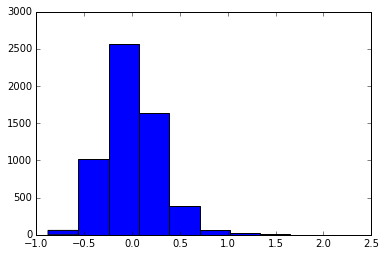

In [55]:
res = lm(formula='n0 ~ 1 + category', data=neural_data_frame)
resid_vec_res = np.asarray(resid(res))
plt.hist(resid_vec_res);
resid_vec_res.var()

0.032766009456335218

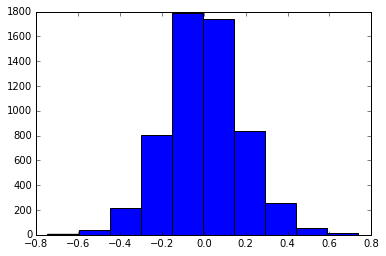

In [71]:
#now let's look at a neuron that we *expect* to be categorical
res = lm(formula='n184 ~ 1 + category', data=neural_data_frame)
resid_vec_res = np.asarray(resid(res))
plt.hist(resid_vec_res);
resid_vec_res.var()

In [80]:
res

R object with classes: ('lm',) mapped to:
<ListVector - Python:0x7f8e799a47a0 / R:0xd691290>
[Float..., Float..., Float..., ..., Vector, Formula, DataF...]
  coefficients: <class 'rpy2.robjects.vectors.FloatVector'>
  R object with classes: ('numeric',) mapped to:
<FloatVector - Python:0x7f8e79978fc8 / R:0x1e9205a0>
[-0.029444, -0.018860, 0.013143, ..., 0.053717, -0.031061, -0.039967]
  residuals: <class 'rpy2.robjects.vectors.FloatVector'>
  R object with classes: ('numeric',) mapped to:
<FloatVector - Python:0x7f8e799781b8 / R:0x20a50af0>
[0.190417, 0.015420, -0.217066, ..., 0.084531, -0.106369, -0.019646]
  effects: <class 'rpy2.robjects.vectors.FloatVector'>
  R object with classes: ('numeric',) mapped to:
<FloatVector - Python:0x7f8e799787a0 / R:0xea55f50>
[-0.074215, -1.413663, -0.704820, ..., 0.074523, -0.116378, -0.029654]
  ...
  coefficients: <class 'rpy2.robjects.vectors.Vector'>
  R object with classes: ('lm',) mapped to:
<Vector - Python:0x7f8e79978d88 / R:0xca5f4c0>
[RNUL

In [128]:
np.asarray(res[0]).shape

(8,)

In [82]:
np.asarray(res[0])

array([-0.02944394, -0.01885967,  0.01314343, -0.0247192 ,  0.2911198 ,
        0.05371732, -0.03106055, -0.03996662])

0.04277590536839504

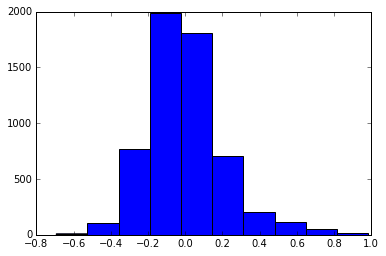

In [57]:
res = lm(formula='n184 ~ 1 + rotation_xy', data=neural_data_frame)
resid_vec_res = np.asarray(resid(res))
plt.hist(resid_vec_res);
resid_vec_res.var()

0.077938275596386372

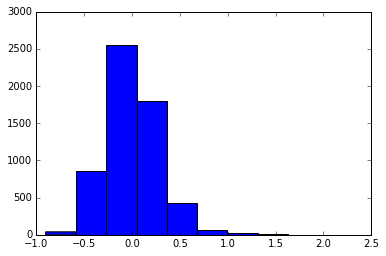

In [58]:
res = lme4.lmer(formula='n0 ~ 1 + object_name + category + (1|category)', data=neural_data_frame)
resid_vec_res = np.asarray(resid(res))
plt.hist(resid_vec_res);
resid_vec_res.var()

In [37]:
resids_lm_simple = np.asarray([resid(lm(formula='n%d ~ 1 + size + translation_y + translation_z +'
                                               'rotation_xy + rotation_yz + rotation_xz' % d, 
                                               data=neural_data_frame)) 
                              for d in range(0, 296, 20)])

In [83]:
resids_lm_simple.shape

(15, 5760)

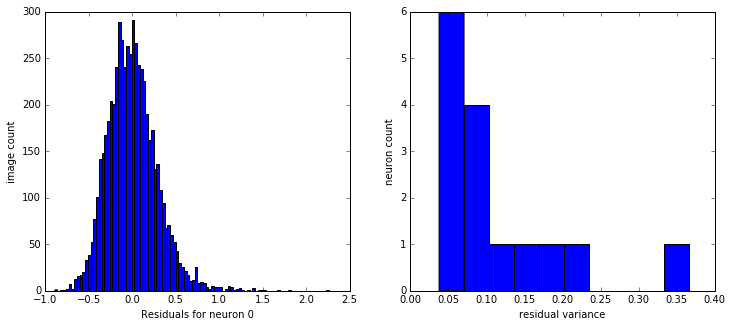

In [129]:
fig = plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(resids_lm_simple[0], bins=100);
plt.xlabel('Residuals for neuron 0')
plt.ylabel('image count')
plt.subplot(1, 2, 2)
plt.hist(resids_lm_simple.var(1));
plt.xlabel('residual variance')
plt.ylabel('neuron count')

In [31]:
resids_lm = np.asarray([resid(lm(formula='n%d ~ 1 + size + translation_y + translation_z +'
                                               'rotation_xy + rotation_yz + rotation_xz + object_name' % d, 
                                               data=neural_data_frame)) 
                              for d in range(0, 296, 20)])

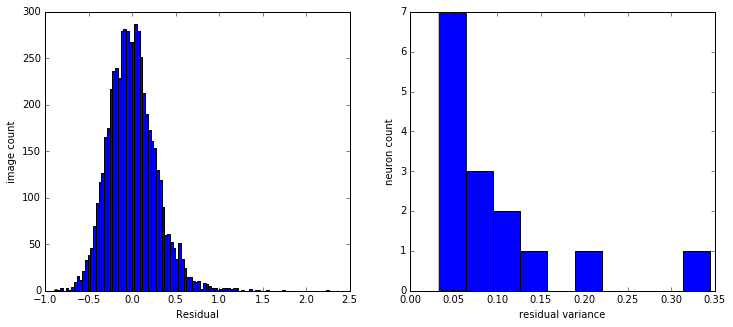

In [89]:
fig = plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(resids_lm[0], bins=100);
plt.xlabel('Residual')
plt.ylabel('image count')
plt.subplot(1, 2, 2)
plt.hist(resids_lm.var(1));
plt.xlabel('residual variance')
plt.ylabel('neuron count')

In [32]:
resids_lmer_rand_intercept = np.asarray([resid(lme4.lmer(formula='n%d ~ 1 + size + translation_y + translation_z +'
                                                         'rotation_xy + rotation_yz + rotation_xz + ' 
                                                         '(1|object_name)' % d, 
                                          data=neural_data_frame)) for d in range(0, 296, 20)])

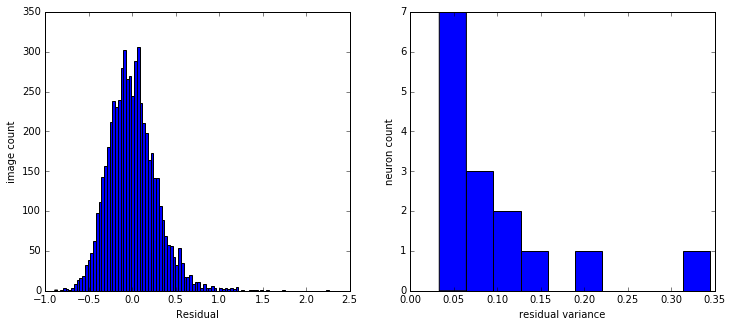

In [90]:
fig = plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(resids_lmer_rand_intercept[0], bins=100);
plt.xlabel('Residual')
plt.ylabel('image count')
plt.subplot(1, 2, 2)
plt.hist(resids_lmer_rand_intercept.var(1));
plt.xlabel('residual variance')
plt.ylabel('neuron count')

In [33]:
resids_lmer_rand_slope = np.asarray([resid(lme4.lmer(formula='n%d ~ size + translation_y + translation_z +'
                                                     'rotation_xy + rotation_yz + rotation_xz +' 
                                          '(1+size+translation_y + translation_z+rotation_xy + rotation_yz + rotation_xz|object_name)' % d, 
                                          data=neural_data_frame)) for d in range(0, 296, 20)])

/usr/local/lib/python2.7/dist-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: 4: 
  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python2.7/dist-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: In optwrap(optimizer, devfun, opt$par, lower = rho$lower, control = control,  :
  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python2.7/dist-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: 5: 
  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python2.7/dist-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning:  Model failed to converge with max|grad| = 7.48562 (tol = 0.002, component 1)

  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python2.7/dist-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: 6: 
  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python2.7/dist-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning:  Model is nearly unidentifiable: very large eigenvalue
 - Rescale variables?

  warnings.warn(x, RRuntimeWarning)
/

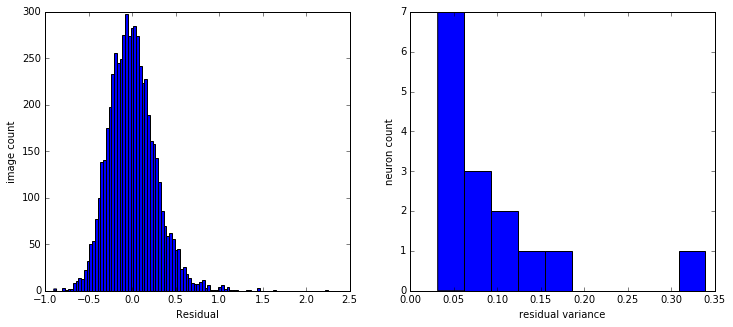

In [91]:
fig = plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(resids_lmer_rand_slope[0], bins=100);
plt.xlabel('Residual')
plt.ylabel('image count')
plt.subplot(1, 2, 2)
plt.hist(resids_lmer_rand_slope.var(1));
plt.xlabel('residual variance')
plt.ylabel('neuron count')

In [38]:
resids_lm_simple.var(axis=1) - resids_lmer_rand_intercept.var(axis=1)

array([ 0.00540252,  0.02095933,  0.00167607,  0.01371456,  0.00604386,
        0.0009609 ,  0.01562236,  0.01037694,  0.00874247,  0.00662637,
        0.01357881,  0.01195196,  0.06952596,  0.00112671,  0.        ])

In [130]:
resids_lm.var(axis=1) - resids_lmer_rand_intercept.var(axis=1)

array([ -1.37731459e-04,  -6.64738365e-04,  -1.53016013e-04,
        -3.11310943e-05,  -2.21782385e-05,  -1.46442891e-04,
        -2.78538409e-04,  -1.12552308e-04,  -3.31850009e-04,
        -5.02159642e-05,  -5.54466402e-05,  -8.71838313e-05,
        -2.66925478e-05,  -2.10290005e-04,  -3.85231319e-04])

In [39]:
resids_lm_simple.var(axis=1) - resids_lmer_rand_slope.var(axis=1)

array([ 0.00906039,  0.02673226,  0.00291349,  0.01674122,  0.0078159 ,
        0.00227965,  0.02320486,  0.01250912,  0.01238066,  0.00702836,
        0.01784366,  0.0193374 ,  0.08094114,  0.00218804,  0.00056743])

array([ -1.37731459e-04,  -6.64738365e-04,  -1.53016013e-04,
        -3.11310943e-05,  -2.21782385e-05,  -1.46442891e-04,
        -2.78538409e-04,  -1.12552308e-04,  -3.31850009e-04,
        -5.02159642e-05,  -5.54466402e-05,  -8.71838313e-05,
        -2.66925478e-05,  -2.10290005e-04,  -3.85231319e-04])

In [35]:
resids_lm.var(axis=1) - resids_lmer_rand_slope.var(axis=1)

array([ 0.00352015,  0.00510819,  0.0010844 ,  0.00299553,  0.00174985,
        0.00117231,  0.00730397,  0.00201962,  0.00330634,  0.00035178,
        0.00420939,  0.00729826,  0.01138849,  0.00085103,  0.0001822 ])